Инициализация данных для варианта 7

In [ ]:
import numpy as np # Импорт библиотеки NumPy для работы с массивами и математикой
import matplotlib.pyplot as plt # Импорт библиотеки matplotlib для построения графиков
np.random.seed(0) # Фиксируем генератор случайных чисел для воспроизводимости результатов
n_samples = 250 # Количество случайных точек для классификации

In [ ]:
# Вариант 7
# Полякова Варвара Антоновна
# Симоненко Сергей Александрович
# Парфенюк Дмитрий Александрович
X = np.random.rand(n_samples, 2) # Генерация n_samples точек в двумерном пространстве [0, 1) x [0, 1)
Y = (((3*X[:, 0]-0.3))+(-0.5*X[:, 1]-0.3) < 0.5) # Условие для разметки классов: если результат < 0.5 — класс 1, иначе 0

Реализация перцептрона

In [ ]:
def step_function(x):   # определим пороговую функцию активации 
    return np.where(x >= 0, 1, 0) # (переводит в 0 или 1)

def perceptron_predict(X, weights, bias): # Функция прогнозирования класса с использованием перцептрона
    return step_function(np.dot(X, weights) + bias) # X·w + b → активация

def perceptron_train(X, Y, learning_rate=0.1, epochs=1000): # Обучение модели методом перцептрона
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)  # веса сделаем нулями
    bias = 0  # смещение

    for _ in range(epochs): # Проходим по всем эпохам (итерациям обучения)
        for i in range(n_samples): # Итерируем по каждой точке
            prediction = perceptron_predict(X[i], weights, bias) # Предсказание текущей точки
            # Обновляем веса и смещение с использованием метода градиентного спуска
            weights += learning_rate * (Y[i] - prediction) * X[i]
            bias += learning_rate * (Y[i] - prediction)

    return weights, bias # Возвращаем обученные веса и смещение

weights, bias = perceptron_train(X, Y) # обучение перцептрона на сгенерированных данных

Будем использовать обученные весовые коэффициенты и смещение для построения графика разделяющей прямой и отображения точек данных

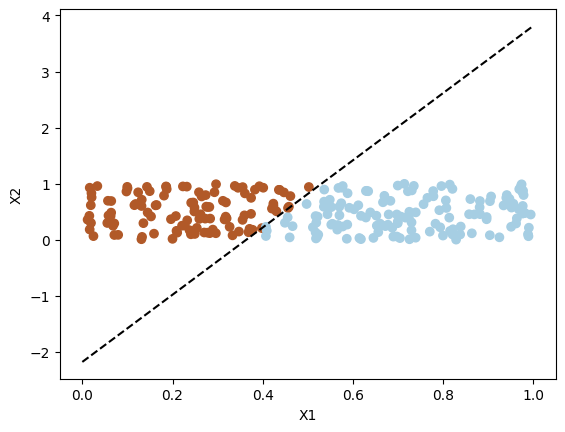

Weights: [-1.37663034  0.22991569]
Bias: 0.5


In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired) # график, разделяющий классы
plt.xlabel('X1')
plt.ylabel('X2')

x_vals = np.linspace(0, 1, 100) # вычисление координат прямой, разделяющей классы
y_vals = (-weights[0] * x_vals - bias) / weights[1] # Формула прямой: w1*x + w2*y + b = 0 → y = ...


plt.plot(x_vals, y_vals, 'k--') # построение разделяющей прямой

plt.show() # итоговый график

print("Weights:", weights) # весовые коэффициенты
print("Bias:", bias) # смещение

Проанализиируем как различные различные начальные весовые коэффициенты и смещения влияют на результаты классификации (число точек уменьшим).
Изменим начальные приближения перед обучением перцептрона. Введем некоторые случайные начальные веса и смещение и проанализируем, как это повлияет на результат.

Повтор на меньшем наборе (15 точек) с разными весами

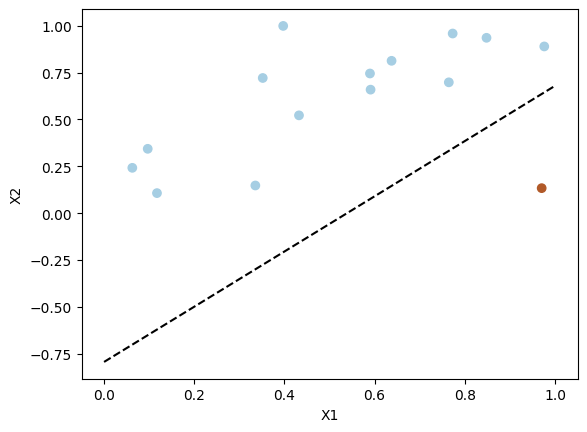

Weights: [ 0.44154123 -0.29966564]
Bias: -0.23793740414879264


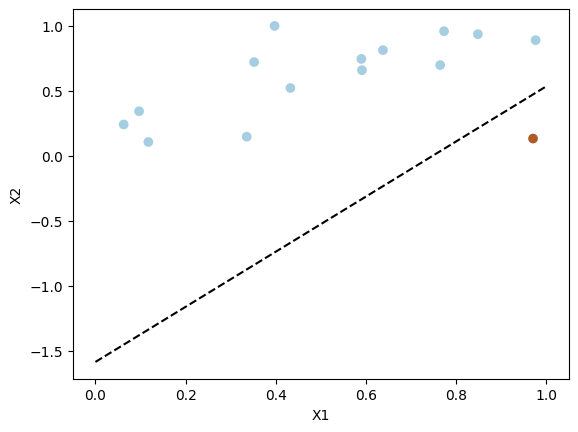

Weights: [ 0.27125323 -0.12801137]
Bias: -0.20274200521235938


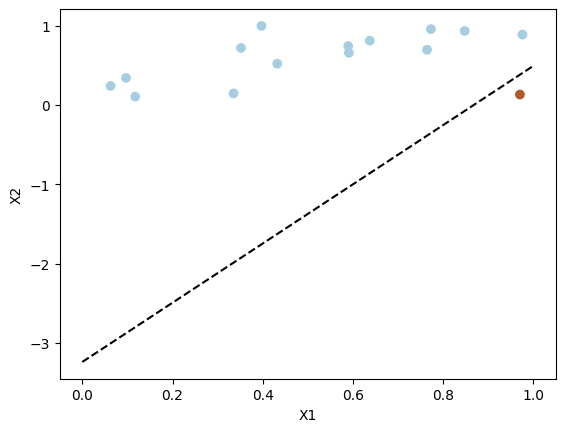

Weights: [ 0.34829889 -0.09325923]
Bias: -0.30222309217465826


In [10]:
n_samples = 15 # число точек

X = np.random.rand(n_samples, 2) # генерирование новых случайных точек в двумерном пространстве

Y = (((5*X[:, 0]-0.9) + (-4*X[:, 1]-0.1)) > 0.5).astype(int) # создание меток классов с помощью заданного условия и явное приведение к int

def step_function(x):   # определение пороговой функции активации
    return np.where(x >= 0, 1, 0)

def perceptron_predict(X, weights, bias):  # прогнозирование класса с использованием перцептрона
    return step_function(np.dot(X, weights) + bias)

def perceptron_train(X, Y, learning_rate=0.1, epochs=1000, init_weights=None, init_bias=None): # обучение перцептрона
    n_samples, n_features = X.shape
    if init_weights is None:    # Если начальные веса не заданы — инициализируем нулями
        weights = np.zeros(n_features)  # веса 
    else:
        weights = init_weights #Иначе используем переданные веса 
    if init_bias is None:
        bias = 0  # смещение
    else:
        bias = init_bias

    for _ in range(epochs): # Обучаем
        for i in range(n_samples):
            prediction = perceptron_predict(X[i], weights, bias)
            weights += learning_rate * (Y[i] - prediction) * X[i]  # градиентный спуск - обновоение
            bias += learning_rate * (Y[i] - prediction)

    return weights, bias

# Используем различные начальные веса и смещения
init_weights_list = [np.random.rand(2), np.random.rand(2), np.random.rand(2)]
init_bias_list = [np.random.rand(), np.random.rand(), np.random.rand()]

# Обучаем и визуализируем перцептрон с различными начальными весами и смещениями
for init_weights, init_bias in zip(init_weights_list, init_bias_list):
    weights, bias = perceptron_train(X, Y, init_weights=init_weights, init_bias=init_bias)

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)  # построение графика, разделяющего классы
    plt.xlabel('X1')
    plt.ylabel('X2')

    x_vals = np.linspace(0, 1, 100)  # вычисление координат прямой, разделяющей классы
    y_vals = (-weights[0] * x_vals - bias) / weights[1]

    plt.plot(x_vals, y_vals, 'k--')     # построение прямой, разделяющей классы

    plt.show()     # график

    print("Weights:", weights) #весовые коэффициенты и смещение
    print("Bias:", bias)

### Результаты 

Провели бинарную классификацию с использованием простейшего перцептрона с пороговой функцией активации. Сгенерировали случайные точки в двумерном пространстве для двух классов, после чего обучили перцептрон на этом наборе данных с использованием метода градиентного спуска. Построили разделяющую прямую, разделяющую два класса, с использованием обученных весовых коэффициентов и смещения.

График демонстрирует результаты классификации, где каждая точка на графике представляет собой один из двух классов, а разделяющая прямая определяет границу между этими классами. Также выведены весовые коэффициенты и смещение были выведены, для того, чтобы мы могли увидеть как именно была построена разделяющая прямая. 


Выводы:

Модель перцептрона успешно отделяет два класса в линейно-разделимом случае.

Результат зависит от кол-ва точек: на 15 точках он менее стабилен.

Разные начальные веса могут привести к разным границам решения, но в линейном случае всё равно сходится к схожим результатам.